## Young people survey
### 사용 데이터
- [Young People Survey](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey)
- Data Description
  - Music preferences (19 items)
  - Movie preferences (12 items)
  - Hobbies & interests (32 items)
  - Phobias (10 items)
  - Health habits (3 items)
  - Personality traits, views on life, & opinions (57 items)
  - Spending habits (7 items)
  - Demographics (10 items)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("./responses.csv")
df = data.copy()
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
print(df.shape)

(1010, 150)


=> 150개 칼럼에 대해 1010명의 응답 내용이 있다. 칼럼이 너무 많으므로 분석 목표부터 정한 후 필요한 데이터만 가지고 전처리를 해야 할 것 같다.

In [5]:
df_columns = pd.read_csv("./columns.csv")
df_columns

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country
...,...,...
145,I am,Left - right handed
146,Highest education achieved,Education
147,I am the only child,Only child
148,I spent most of my childhood in a,Village - town


### Demographic statistics visualization
분석을 하기 전, 응답자에 대한 정보를 알아보고자 한다.  

키, 몸무게 등 분석에서 참고할 요인이 아니라고 판단되는 칼럼들은 삭제한다. 

In [6]:
demographics = list(df_columns[-10:].short)

In [7]:
demographics_df = df[demographics]
demographics_df.drop(['Height','Weight','Only child','House - block of flats'], axis=1, inplace=True)
demographics_df

C:\Users\12yoo\AppData\Local\Temp\ipykernel_708\3582814931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics_df.drop(['Height','Weight','Only child','House - block of flats'], axis=1, inplace=True)


,Age,Number of siblings,Gender,Left - right handed,Education,Village - town
0,20.0,1.0,female,right handed,college/bachelor degree,village
1,19.0,2.0,female,right handed,college/bachelor degree,city
2,20.0,2.0,female,right handed,secondary school,city
3,22.0,1.0,female,right handed,college/bachelor degree,city
4,20.0,1.0,female,right handed,secondary school,village
...,...,...,...,...,...,...
1005,20.0,1.0,female,right handed,secondary school,city
1006,27.0,5.0,male,left handed,masters degree,village
1007,18.0,0.0,female,right handed,secondary school,city
1008,25.0,1.0,female,right handed,college/bachelor degree,city


In [8]:
demographics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Number of siblings,1004.0,1.297809,1.013348,0.0,1.0,1.0,2.0,10.0


<AxesSubplot:xlabel='Age'>

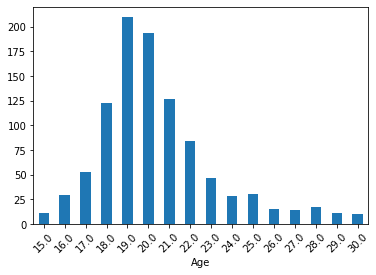

In [76]:
ageInfo = demographics_df.groupby(['Age'])['Age'].count()
ageInfo.plot.bar(rot=45)

In [75]:
siblingsInfo = demographics_df['Number of siblings'].value_counts()
siblingsInfo

1.0     535
2.0     202
0.0     163
3.0      73
4.0      18
5.0       9
6.0       3
10.0      1
Name: Number of siblings, dtype: int64

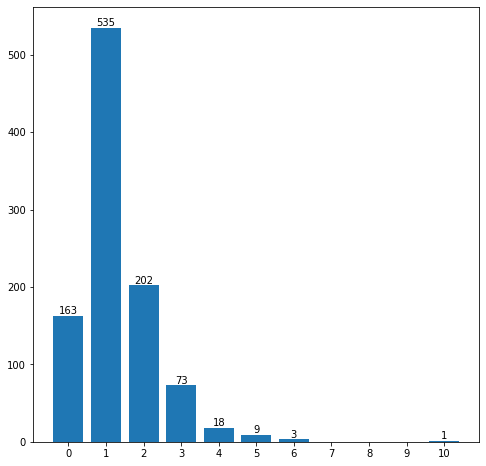

In [97]:
fig, ax = plt.subplots(figsize = (8,8))
bars = ax.bar(siblingsInfo.index, siblingsInfo.values)
ax.bar_label(bars)
plt.xticks(list(range(0,11,1)))
plt.show()

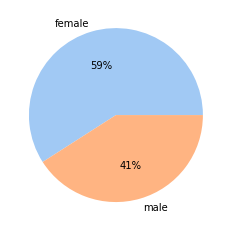

In [100]:
genderInfo = demographics_df['Gender'].value_counts()
colors = sns.color_palette('pastel')[0:len(genderInfo)]
plt.pie(genderInfo.values, labels = genderInfo.index, colors=colors, autopct='%.0f%%')
plt.show()

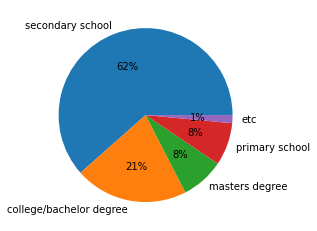

In [114]:
eduInfo = demographics_df['Education'].value_counts()
eduInfo['etc'] = eduInfo['currently a primary school pupil'] + eduInfo['doctorate degree']
eduInfo.drop(['currently a primary school pupil','doctorate degree'], inplace=True)
plt.pie(eduInfo.values, labels = eduInfo.index, autopct='%.0f%%')
plt.show()

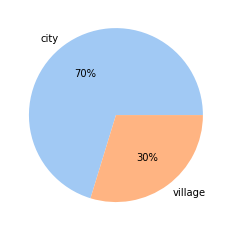

In [115]:
live_in = demographics_df['Village - town'].value_counts()
colors = sns.color_palette('pastel')[0:len(live_in)]
plt.pie(live_in.values, labels = live_in.index, colors=colors, autopct='%.0f%%')
plt.show()

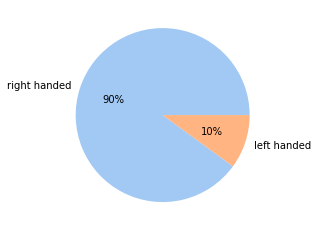

In [9]:
dominant_hand = demographics_df['Left - right handed'].value_counts()
colors = sns.color_palette('pastel')[0:len(dominant_hand)]
plt.pie(dominant_hand.values, labels = dominant_hand.index, colors=colors, autopct='%.0f%%')
plt.show()